<a href="https://colab.research.google.com/github/kpal002/Jupyter-notebooks-for-Blogs/blob/main/PyTorchBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello, pytorch

![img](https://pytorch.org/tutorials/_static/pytorch-logo-dark.svg)

[PyTrorch](http://pytorch.org/) and [TensorFlow](https://www.tensorflow.org/) are two of the most commonly used deep learning frameworks. Both of these tools are notable for their ability to compute gradients automatically and do operations on GPU, which can be by orders of magnitude faster than running on CPU. Both libraries serve the same purpose, choosing between them is a matter of preference.

In this school, we'll use PyTorch for our practical examples.

We'll start from using the low-level core of PyTorch, and then try out some high-level features.

In [66]:
import numpy as np
import torch
print(torch.__version__)

1.13.1+cu116


In [67]:
# # Install pytorch 2.0
# %%capture
# !pip uninstall torch
# !pip install torch

In [68]:
# numpy world

x = np.arange(16).reshape(4, 4)

print(f"X :\n{             x}")
print(f"X.shape : {        x.shape}")
print(f"add 5 :\n{         x + 5}")
print(f"X*X^T :\n{         x @ x.T}")
print(f"mean over rows :\n{x.mean(axis=-1)}")
print(f"cumsum of cols :\n{x.cumsum(axis=0)}")

X :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
X.shape : (4, 4)
add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
X*X^T :
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
mean over rows :
[ 1.5  5.5  9.5 13.5]
cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]


In [69]:
# pytorch world

x = np.arange(16).reshape(4, 4)

x = torch.tensor(x, dtype=torch.float32)  # or torch.arange(0,16).reshape(4,4).to(torch.float32)

print(f"X :\n{             x}")
print(f"X.shape : {        x.shape}")
print(f"add 5 :\n{         x + 5}")
print(f"X*X^T :\n{         x @ x.T}")
print(f"mean over rows :\n{x.mean(axis=-1)}")
print(f"cumsum of cols :\n{x.cumsum(axis=0)}")

X :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
X.shape : torch.Size([4, 4])
add 5 :
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T :
tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over rows :
tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


## NumPy and Pytorch

As you can notice, pytorch allows you to hack stuff much the same way you did with numpy. The syntax is in some ways compatible with numpy (as in the example above), [to some extent](https://github.com/pytorch/pytorch/issues/38349).

Though original naming conventions in PyTorch are a bit different, so if you look up documentation to various functions you may notice for example patameter name `dim` instead of `axis`.

Also type conversions need be done explicitly. So operations that cannot be done on current type will raise an error rather than converting the tensor:

In [70]:
x = torch.arange(5)
x.to(float).mean() 

tensor(2., dtype=torch.float64)

In [71]:
x = torch.tensor([1, 2]).to(float)
x /= 2.0 # instead try: `x /= 2`
x

tensor([0.5000, 1.0000], dtype=torch.float64)

Converting tensors back to numpy:

In [72]:
x = torch.ones(size=(3, 5))
x.numpy()

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

## Warmup: trigonometric knotwork
_inspired by [this post](https://www.quora.com/What-are-the-most-interesting-equation-plots)_

There are some simple mathematical functions with cool plots. For one, consider this:

$$ x(t) = t - 1.5 * cos( 15 t) $$
$$ y(t) = t - 1.5 * sin( 16 t) $$


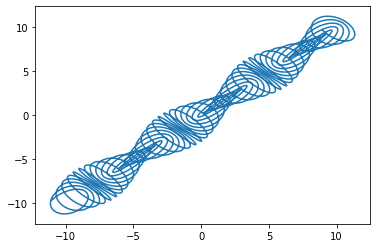

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

t = torch.linspace(-10, 10, steps=10000)

# compute x=x(t) and y=y(t) as defined above
# your code here
x = t - 1.5*np.cos(15*t)
y = t - 1.5*np.sin(16*t)


plt.plot(x.numpy(), y.numpy());

In [74]:
assert np.isclose(x[42].item(), -9.2157)
assert np.isclose(y[1990].item(), -4.6997)


--------

## Automatic gradients

Any self-respecting DL framework must do your backprop for you. Torch handles this with the `autograd` module.

The general pipeline looks like this:
* When creating a tensor, you mark it as `requires_grad`:
    * __```torch.zeros(5, requires_grad=True)```__
    * __```torch.tensor(np.arange(5), dtype=torch.float32, requires_grad=True)```__
* Define some differentiable `y = arbitrary_function(x)`
* Call `y.backward()`
* Gradients are now available as ```x.grad```

__Here's a few examples:__

In [75]:
x = torch.tensor(0., requires_grad=True)
y = torch.sin(x)
y.backward()
x.grad

tensor(1.)

In [76]:
# Remember we defined MSE loss with its gradient last week?
# With torch we could've skipped the gradient part:

def MSELoss(y, yhat):
    return ((y - yhat)**2).mean()

y = torch.normal(0., 1., size=(100,))
yhat = torch.normal(0., 1., size=(100,), requires_grad=True)

loss = MSELoss(y, yhat)
loss.backward()

print("Checking autograd result equals to analytical derivative.")
print("    check result:", torch.allclose(yhat.grad, 2 * (yhat - y) / y.shape[0]))

Checking autograd result equals to analytical derivative.
    check result: True


__Note:__ calling `backward` multiple times accumulates the sum of gradients:

In [77]:
x = torch.tensor(0., requires_grad=True)
y1 = torch.sin(x)
y2 = torch.sin(x)

print("x.grad =", x.grad)
y1.backward()
print("x.grad =", x.grad)
y2.backward()
print("x.grad =", x.grad)

x.grad = None
x.grad = tensor(1.)
x.grad = tensor(2.)


so typically when using it inside learning loop you want to zero the accumulated gradients between the consequtive `backward()` calls, e.g.:

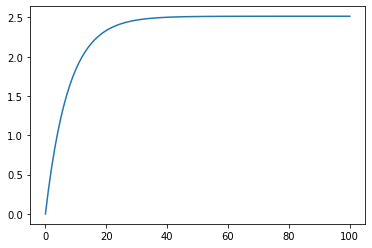

In [78]:
# Generate linear data:
x = torch.tensor(np.random.uniform(-3, 5, 100), dtype=torch.float32)
y = 2.5 * x + torch.normal(mean=0., std=0.4, size=x.shape)

w = torch.tensor(0., dtype=torch.float32, requires_grad=True)
w_values_history = [
    w.item() # this returns a python number with the value of the tensor
]

for _ in range(100):
    loss = MSELoss(y, w * x)
    loss.backward()
    with torch.no_grad(): #  = "don't calculate gradients in the block below"
        w -= 0.01 * w.grad

    w.grad.zero_() # just for the lulz try commenting this out
    w_values_history.append(w.item())

plt.plot(w_values_history);

Calling `backward()` for a tensor:

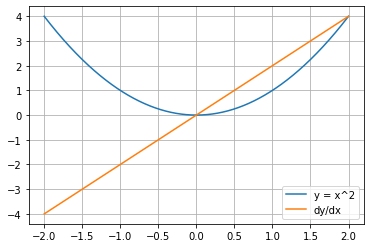

In [79]:
x = torch.linspace(-2, 2, 1000, requires_grad=True)
y = x**2

# Note: since `x` and `y` are both vectors, the derivative is
# defined in the form of Jacobian dy/dx.
# For such cases `backward()` is implemented to calculate
# the Jacobian multiplied by some other vector that you
# have to provide as an argument e.g. `y.backward(some_vector)` -
# this will return Jacobian dy/dx times `some_vector`.

# Since our Jacobian is diagonal, the following code will return
# per-element derivative values:
y.backward(torch.ones_like(y))

plt.plot(x.detach(), y.detach(), label='y = x^2')
plt.plot(x.detach(), x.grad, label="dy/dx")
plt.legend();
plt.grid(True);

Second derivative example:

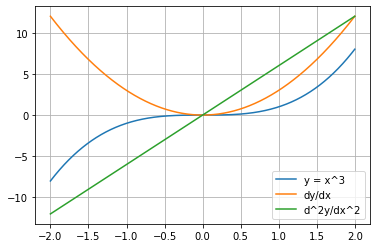

In [80]:
x = torch.linspace(-2, 2, 1000, requires_grad=True)
y = x**3

first_derivative, = torch.autograd.grad(
    y, x, torch.ones_like(y),
    create_graph=True # "create_graph" required to be able to calculate derivative of the derivative later
)
second_derivative, = torch.autograd.grad(first_derivative, x, torch.ones_like(first_derivative))

plt.plot(x.detach(), y.detach(), label='y = x^3')
plt.plot(x.detach(), first_derivative.detach(), label="dy/dx")
plt.plot(x.detach(), second_derivative, label="d^2y/dx^2")
plt.legend();
plt.grid(True);

---------------------
## High-level pytorch

So far we've been dealing with low-level torch API. While it's absolutely vital for any custom losses or layers, building large neura nets in it is a bit clumsy.

Luckily, there's also a high-level torch interface with a pre-defined layers, activations and training algorithms. 

We'll cover them as we go through a simple image recognition problem: classifying handwritten digits.


In [81]:
from torchvision.datasets import MNIST
from IPython.display import clear_output
ds_train = MNIST(".", train=True, download=True)
ds_test = MNIST(".", train=False, download=True)

X_train, y_train = ds_train.data.reshape(-1, 784).to(torch.float32) / 255., ds_train.targets
X_test, y_test = ds_test.data.reshape(-1, 784).to(torch.float32) / 255., ds_test.targets

clear_output()
print(f"Train size = {len(X_train)}, test_size = {len(X_test)}")

Train size = 60000, test_size = 10000


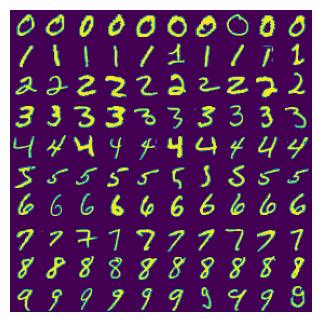

In [82]:
plt.figure(figsize=(4, 4), dpi=100)
plt.axis('off')
plt.imshow(
    torch.transpose(
        torch.cat(
            [X_train[y_train == c][:10] for c in range(10)], axis=0
        ).reshape(10, 10, 28, 28),
        1, 2
    ).reshape(280, 280)
);

Let's start with layers.

In [83]:
from torch import nn
import torch.nn.functional as F

There's a vast library of popular layers and architectures already built for ya'.

We'll train a single hidden layer fully connected neural network.

In [84]:
# GPU support
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a network that stacks layers on top of each other
model = nn.Sequential(
    nn.Linear(784, 100), # add first "dense" layer with 784 input
                         # units and 100 output units (hidden layer
                         # with 100 neurons).
    nn.ReLU(),
    nn.Linear(100, 10), # "dense" layer with 10 output
                        # units (for 10 classes).
).to(device)

cpu


In [85]:
print("Weight shapes:")
for w in model.parameters():
    print("  ", w.shape)

Weight shapes:
   torch.Size([100, 784])
   torch.Size([100])
   torch.Size([10, 100])
   torch.Size([10])


In [86]:
# now we can simply call it on our data to get the model output:
prediction = model(X_train.to(device))
print(prediction.shape)

torch.Size([60000, 10])


So far our last layer is linear, with outputs (class scores) possibly taking all values in the range $(-\infty, +\infty)$. For training, we can use the same approach as we did for the multinomial logistic regression: model class probabilities and minimize negative log likelihood.

Given the ouput $\mathbf{x}=\{x_1,...x_K\}$ of the last layer, the probability modeling can be done with e.g. the **softmax** function:
$$P(y=C|\mathbf{x})=\frac{\exp(x_C)}{\sum_{C'}\exp(x_{C'})}$$

This formula may be numerically unstable for large components of $\bf{x}$. To avoid that, you can divide both numerator and denominator by $\exp\left(\max x_{C'}\right)$, and then substitute it into the negative log likelihood.

In PyTorch, both this steps are combined in the `torch.nn.CrossEntropyLoss`, which can be used like this:

In [87]:
loss_fn = nn.CrossEntropyLoss()
loss_fn(prediction, y_train.to(device))

tensor(2.3036, grad_fn=<NllLossBackward0>)

One last thing we need — the optimizer. Optimizers are high level objects that implement all those fancy gradient descent modifications - like Adam, RMSprop and others.

To use one, simply create that object and pass it the parameters you want it to optimize:

In [88]:
opt = torch.optim.Adam(model.parameters(), lr=1e-3)

then, inside the training loop you:
 1. calculate the gradients (`loss.backward()`)
 1. use the optimizer to update the model parameters (`opt.step()`)
 1. zero the gradients (`opt.zero_grad()`)

Here's the training loop:

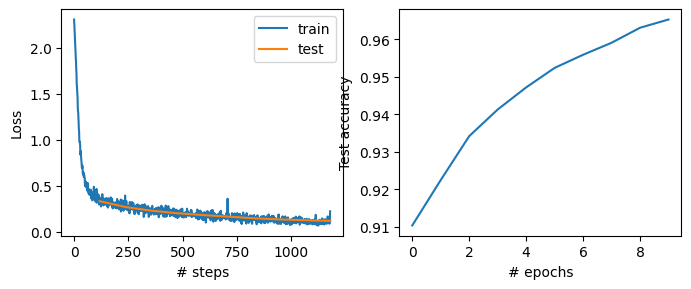

In [89]:
from tqdm import trange  # utility function to show progress bar

num_epochs = 10
batch_size = 512

# some quantities to plot
train_losses = []
test_losses = []
test_accuracy = []

# "epoch" = one pass through the dataset
for i_epoch in range(num_epochs):
    shuffle_ids = np.random.permutation(len(X_train)) # shuffle the data
    for idx in trange(0, len(X_train), batch_size):
        # get the next chunk (batch) of data:
        batch_X = X_train[shuffle_ids][idx : idx + batch_size].to(device)
        batch_y = y_train[shuffle_ids][idx : idx + batch_size].to(device)

        # all the black magic:
        loss = loss_fn(model(batch_X), batch_y)
        loss.backward()
        opt.step()
        opt.zero_grad()

        # remember the loss value at this step
        train_losses.append(loss.item())
    
    # evaluate test loss and metrics
    test_prediction = model(X_test.to(device))
    test_losses.append(
        loss_fn(test_prediction, y_test.to(device)).item()
    )
    test_accuracy.append(
        (test_prediction.argmax(axis=1) == y_test.to(device)).to(float).mean()
    )

    # all the rest is simply plotting

    clear_output(wait=True)
    plt.figure(figsize=(8, 3), dpi=100)
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='train')
    plt.plot(
        np.linspace(0, len(train_losses), len(test_losses) + 1)[1:],
        test_losses, label='test'
    )
    plt.ylabel("Loss")
    plt.xlabel("# steps")
    plt.legend();

    plt.subplot(1, 2, 2)
    plt.plot(test_accuracy)
    plt.ylabel("Test accuracy")
    plt.xlabel("# epochs");
    plt.show()

## XOR problem

The best way to learn is to code it yourself. Try building a nerual network to solve the XOR problem below. Can it be solved by a network with no hidden layers?

*Hint: for a binary classification loss function consider checking out `torch.nn.BCEWithLogitsLoss`*

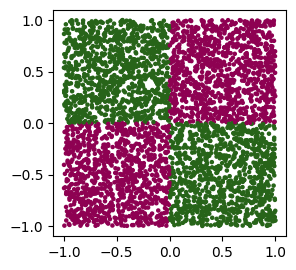

In [90]:
X_XOR = np.random.uniform(-1, 1, size=(4000, 2))
y_XOR = ((X_XOR[:,0] >= 0) ^ (X_XOR[:,1] >= 0)).astype(float)

plt.figure(figsize=(3, 3), dpi=100)
plt.scatter(*X_XOR.T, c=y_XOR, cmap='PiYG', s=5);

In [91]:
X_train_XOR = np.float32(X_XOR)

In [92]:
X_train_XOR

array([[-0.88514906,  0.6838359 ],
       [ 0.62950706,  0.25413397],
       [ 0.6564078 , -0.38567582],
       ...,
       [ 0.9442465 , -0.02487734],
       [ 0.2670676 , -0.02227159],
       [ 0.10293916, -0.6573016 ]], dtype=float32)

In [93]:
y_train_XOR = torch.from_numpy(np.float32(y_XOR))


In [94]:
from numpy.ma.core import outer
# Define the neural network
class XOR_Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(XOR_Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

        
    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)

        return out




In [95]:
# Initialize the neural network
input_dim = 2
hidden_dim = 2
output_dim = 1
model_XOR = XOR_Net(input_dim, hidden_dim, output_dim)

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_XOR.parameters(), lr=0.15)

In [96]:
# Train the neural network
for epoch in range(10000):
    # Forward pass
    outputs = model_XOR(torch.from_numpy(X_train_XOR))

    loss = criterion(outputs, torch.unsqueeze(y_train_XOR,1))
    # backpropogate through the loss gradiants
    loss.backward()

    # update model weights
    optimizer.step()

    # remove current gradients for next iteration
    optimizer.zero_grad()
    
    if (epoch+1) % 500 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 10000, loss.item()))

Epoch [500/10000], Loss: 0.6940
Epoch [1000/10000], Loss: 0.6935
Epoch [1500/10000], Loss: 0.6932
Epoch [2000/10000], Loss: 0.6931
Epoch [2500/10000], Loss: 0.6930
Epoch [3000/10000], Loss: 0.6929
Epoch [3500/10000], Loss: 0.6928
Epoch [4000/10000], Loss: 0.6925
Epoch [4500/10000], Loss: 0.6920
Epoch [5000/10000], Loss: 0.6903
Epoch [5500/10000], Loss: 0.6848
Epoch [6000/10000], Loss: 0.6665
Epoch [6500/10000], Loss: 0.6154
Epoch [7000/10000], Loss: 0.5006
Epoch [7500/10000], Loss: 0.4192
Epoch [8000/10000], Loss: 0.3884
Epoch [8500/10000], Loss: 0.3766
Epoch [9000/10000], Loss: 0.3714
Epoch [9500/10000], Loss: 0.3686
Epoch [10000/10000], Loss: 0.3670


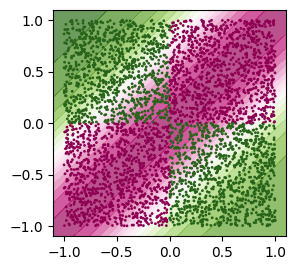

In [97]:
xx1, xx2 = np.meshgrid(
    np.linspace(-1.1, 1.1, 100),
    np.linspace(-1.1, 1.1, 100),
)
yy = model_XOR(torch.tensor(
    np.stack([xx1.ravel(), xx2.ravel()], axis=1),
    dtype=torch.float32
).to(device)).cpu().detach().numpy().reshape(xx1.shape)

plt.figure(figsize=(3, 3), dpi=100)
plt.contourf(xx1, xx2, yy, levels=20, cmap='PiYG', alpha=0.7)
plt.scatter(*X_XOR.T, c=y_XOR, cmap='PiYG', s=1);

In [98]:
assert isinstance(model_XOR, nn.Module)

np.random.seed(42)
X_test_XOR = np.random.uniform(-1, 1, size=(4000, 2))
y_test_XOR = ((X_test_XOR[:,0] >= 0) ^ (X_test_XOR[:,1] >= 0)).astype(int)

prediction = model_XOR(
    torch.tensor(X_test_XOR, dtype=torch.float32).to(device)
).cpu().detach().numpy().squeeze()
accuracy = ((prediction > 0.).astype(int) == y_test_XOR).mean()
print("Accuracy:", accuracy)

Accuracy: 0.8335
